### Title: Customer Review Analysis of Amazon Sales Dataset Using Unsupervised Clustering Algorithms

## 1. PACKAGES

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import string
import html
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


## 2. DATASET

In [2]:
df = pd.read_csv('amazon.csv')

In [3]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [4]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
df = df[['category','discounted_price', 'review_content']]

In [6]:
df.shape

(1465, 3)

Cleaning missing values and duplicates

In [7]:
df.isnull().sum()

category            0
discounted_price    0
review_content      0
dtype: int64

In [8]:
df['review_content'].duplicated().sum()

253

In [9]:
df.drop_duplicates(subset='review_content', keep='first', inplace=True)
df.reset_index(drop=True, inplace=True) #this reset the no of rows


In [10]:
df['review_content'].duplicated().sum()

0

In [11]:
df.shape #total shape with no duplicate or missing values

(1212, 3)

In [12]:
df

category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1207  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1208  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1209  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1210  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1211  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

                                         review_content  
0     Looks durable Charging is fine tooNo complains...  
1     I ordered this cable to connect my phone to An...  
2     Not quite durable and sturdy,https://m.media-a...  
3     Good product,long wire,Charges good,Nice,I bou...  
4     Bought this instead of original apple, does th...  
...                                                 ...  
1207  I received product without spanner,Excellent p...  
1208  ok,got everything as mentioned but the measuri...  
1209  plastic but cool body ,u have to find sturdy s...  
1210  I have installed this in my kitchen working fi...  
1211  It does it job perfectly..only issue is temp c...  

[1212 rows x 3 columns]

In [13]:
df['review_content'].iloc[75]

'Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money'

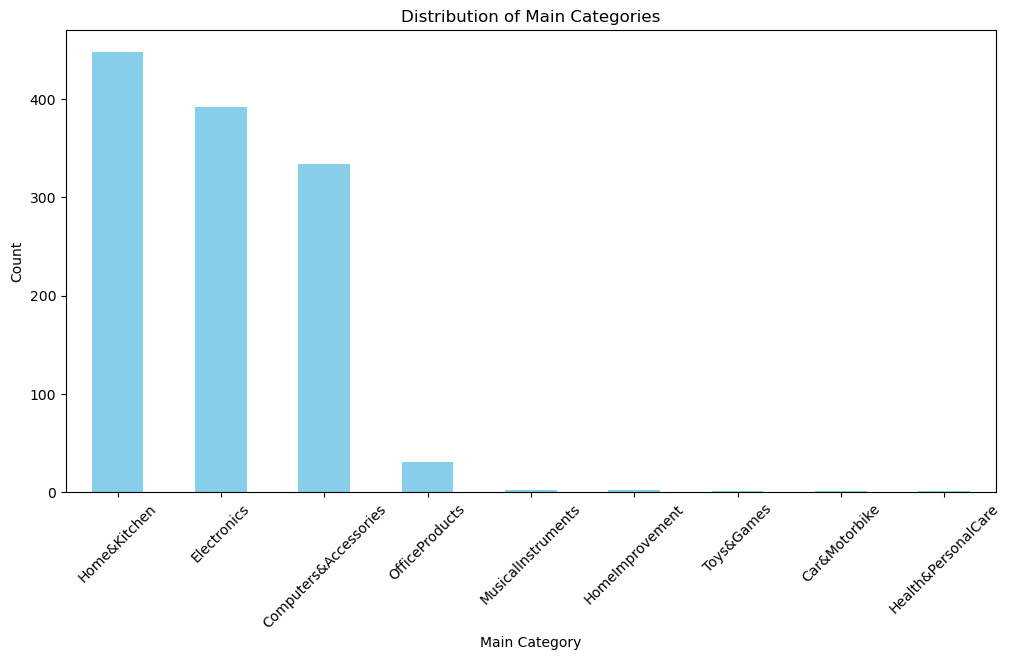

In [14]:
import matplotlib.pyplot as plt

# Split categories and extract the first level
df['main_category'] = df['category'].str.split('|').str[0]

# Plot the distribution of main categories
plt.figure(figsize=(12, 6))
df['main_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

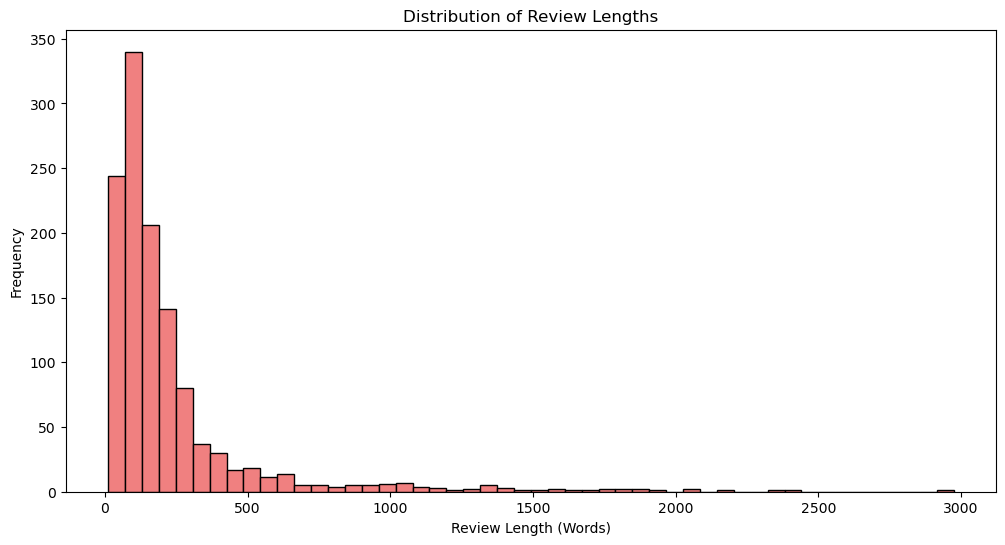

In [15]:
import matplotlib.pyplot as plt

# Calculate the length of reviews in terms of words
review_length = df['review_content'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
plt.hist(review_length, bins=50, color='lightcoral', edgecolor='black')  # Fix the syntax error here
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Words)')
plt.ylabel('Frequency')
plt.show()

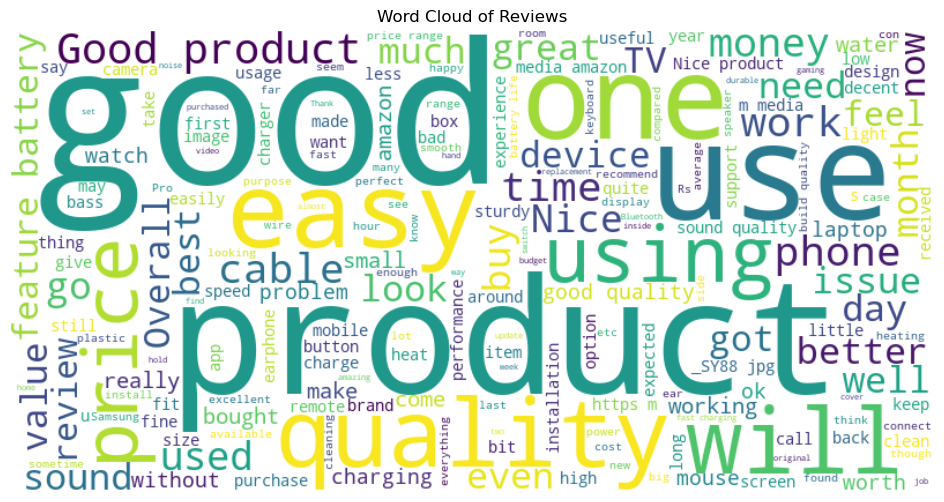

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single text
all_reviews = ' '.join(df['review_content'])

# Generate and plot a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


## 3. TEXT PREPROCESSING

In [17]:
# define abbreviations dictionary
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "amp" : ""
    
}

# Define contractions dictionary
contractions = {
    "won't": "will not",
    "wouldn't": "would not",
    "couldn't": "could not",
    "I'm": "I am",
    "I've": "I have",
    "I'd": "I would",
    "I'll": "I will",
    "can't": "cannot",
    "n't": "not",
    "'d": " would",
    "'re": " are",
    "'s": " is",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am",
}

In [18]:
# Function to find abbreviations and print information directly
def print_abbreviations_info(row):
    found_abbrevs = []
    for key, value in abbreviations.items():
        if key in row['review_content']:
            found_abbrevs.append((key, value))
    
    if found_abbrevs:
        print(f"Category: {row['category']}, Review Content: {row['review_content']}")
        print("Found Abbreviations:")
        for abbrev, full_form in found_abbrevs:
            print(f"  {abbrev}: {full_form}")
        print()

# Apply the function to each row in the DataFrame
df.apply(print_abbreviations_info, axis=1)


Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Review Content: Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money
Found Abbreviations:
  ht: height
  ie: that is
  ps: postscript
  til: today i learned
  u: you

Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Review Content: I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still i

Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Review Content: The product was nice its charging awesome,Cant say anything about durability and sturdiness as the part which gets connected to adapter seems to be in a highly vulnerable state. With a flick of hand it might get bent as my last charging chord got to be so i had to buy this one. Something must be done about that.,Very good worth the money,I had to replace the cable that I had recieved with my laptop. I opted Zoul and am highly satisfied by the cable. It's durable and works seamlessly.,This is an amazing product from Zoul. I bought many other cables before from other brands but they didn't work that well. But this, I must say is the Best of all in terms of charging power, durability and sturdiness. Much Recommend!!,I've been using this cable for over 6 months with my Galaxy S22 it's been working flawlessly. Fast charging works as expected and the 2m length makes it convenient to u

Category: Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions, Review Content: It's a good tv with a picture and sound exceeding its price class. The installation, however, leaves a lot desired. It was delayed until several calls. The technician was not the most well behaved in the world. Overall, happy that I bought this tv.,At this price picture quality is good but connectivity is slow and remote function also,Good one happy with the purchase,,Kodak tv,Ok,Nice TV,Smart and Good work
Found Abbreviations:
  app: application
  cia: central intelligence agency
  ht: height
  ic: i see
  pp: pages
  rt: retweet
  til: today i learned
  u: you

Category: Electronics|HomeTheater,TV&Video|Accessories|RemoteControls, Review Content: Its very strong remote! I ordered 2 other remotes earlier which were very delicate. This one is working perfect and having good durability!,Good,It is value for money,quality average,but serves the purpose,The remote is not of a great quality though it d

Category: Electronics|Mobiles&Accessories|MobileAccessories|Chargers|WallChargers, Review Content: Expect it will last long, price wise it's a good product. Till date it's working well.,One slot got out of order and one using now.value of money and second slot of the charger is average to use.🤪🤪🤪😂😂🇮🇳,Good quality no issues till now working fine with 5v 2ampAs it is 10 watt charger.,Fast charging,Yes it's very nice,https://m.media-amazon.com/images/I/61pgVx61I7L._SY88.jpg,Amazing product. Great charging power even two devices  connected with the charger. I charged my pixel 6a and wireless headphone together, both get charged quickly. But issue with the build quality. I once by mistake sat in the charger and the socket end of it broke from the edges and came out completely. I had to fix that with a fevi quick. Now working fine . Overall a very good product. Don't think, just go for it.,It's a good product for this price range. Works fine.
Found Abbreviations:
  ht: height
  ic: i see
  o

Category: Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones, Review Content: Posting This After 8 Days of Continous Usage:I came from Oneplus 5t that too because last to last week I had an accident and my 5t has dead on the spot.After watching a lot of reviews on Youtube and Amazon, I thought I should give it a chance.First Impression:-• As you all know OP 5t has small display so it's hard for first 3-4 days to use/Typing because of big display.• A little heavy but that could be because of upgraded species and battery from my last 5t.• Solid built but it if it's metal build then it will be more beautiful.• Space fusion color is looking killer.• Flash charger works awsome but charger design can be improved• Display is crisp and clear but but in dark apps (i.e, chrome, brave, linkdin etc) you'll notice a color change (from Black to Greyish color) that gives a cheap feel and I don't know if it's a software or hardware issue.Actual Review:-• While gaming (Call of duty:mo

Category: Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice, Review Content: Packing was not good, over all good product..,Scroll wheel is very small otherwise the product seems good at least at the first use,https://m.media-amazon.com/images/I/615o-xCWE-L._SY88.jpg,Ok,,A bit disappointed with on/off switch.. it’s too tiny .. otherwise product is nice ..,Gave -1 Star for the flimsy top cover and on/off button. Rest all is good. Easy to navigate. On OFF button at the bottom could have been better. Not the regular type of putting the battery at the bottom part. Pull the Top cover and place the battery. the slot is given for the wireless adapter adjacent to the battery compartment. Easy to use. simple plug-and-play. For better results, switch off the mouse only during weekends. draining of battery power to some extent is fine when compared to the clumsiness of the small on/off button.,Good to use.
Found Abbreviations:
  app: application
  eg: example
  ht: hei

Category: Electronics|Cameras&Photography|Accessories|Tripods&Monopods|TripodLegs, Review Content: Very premium and good material use,It's good but one thing I don't like it that phone mount is not good it has broken when I tighting the mount to tripod and when you remove your phone  then you will be seeing some of the scratch or something like this on the back cover.,Good product specially for first time usage people and it's worthy for the price,It's good but after few times using it can't take the weight... but overall it good. I liked it.,good stand .good quality and  finishing also good worth the price.,Overall Good but little high price,This product is best for beginners.  Have some stability issues which you couldn't expect in this price range. Definitely you can go for it..,
Found Abbreviations:
  cia: central intelligence agency
  eg: example
  ft: featuring
  ht: height
  ic: i see
  rt: retweet
  u: you

Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessor

Category: Electronics|Headphones,Earbuds&Accessories|Headphones|Over-Ear, Review Content: Stopped working after a month of use. Don't waste your money on this product,Everything is best but build quality is avg,lets get directly into the Pros & Cons :-sry it will be a long review coz the review have to be useful for everyone who plans to buy this.Pros:-* The Price, given to this price bracket its the best one i can suggest from the built quality to the Audio quality its superior for the price 499/- (i got for this price tag)*then the Comfort, everybody complaining about the earpads i dont know why, if your going for over the ear type u have to be known that u cant wear it all day long the most expensive products also tend to warm your ears and get a little uncomfortable, so if its not preffered u can go for earphones or earbuds. as i bought multiple ober the ear headphones there will be rought cloth like texture that will irritate your ears, But this One has SOFT CUSHION like material,

Category: Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders, Review Content: It works as expected, but the shape of the handle is not very comfortable. It is not feeling very handy to hold the device and press the button at the same time, sometimes the battery  door opens while using it.,It’s easy to use but creates a mess when I try to make coffee froth. Doesn’t form froth also. Only runs under liquid.,The frother stops spinning in even slightly dense liquid.,Product is not working smoothly...after very hard press the button then it works.,Easy to use and nice product. But cream stucks in it sometimes,Can finally make frothy dalgona coffee without losing my arm lol worth it! Coffee came out really well and so easy to use,,Good
Found Abbreviations:
  ft: featuring
  ht: height
  ic: i see
  lol: laughing out loud
  mf: motherfucker
  ps: postscript
  rt: retweet
  tho: though
  u: you

Category: Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Ste

Category: Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|LintShavers, Review Content: Cannot extract small hair and takes lot of time,It clearly removes hair from velvet material but in clothes, not that much. I have a velvet bed for my dog and this serves it's purpose. The cost is high and it is not available in the local market.,It's not that great a product.,Overall the product is good in pocket friendly range.,Can be used only on velvet type material. Thread breaks when used on other materials,I bought it to remove my guinea pig's hair from cloths but it doesn't work well,This works perfectly to remove my dogs hair from sofa and chairs. It gathered even the smallest hair. Awesome product.,I have 3 short hair domestic cats and they like to sleep on my couch. This is a great way to remove furr without power vacuuming.
Found Abbreviations:
  cu: see you
  hr: hour
  ht: height
  ic: i see
  ie: that is
  oc: original content
  og: original
  poc

Category: Home&Kitchen|Heating,Cooling&AirQuality|Fans|CeilingFans, Review Content: It doesn't make any noise. Speed okay for this price range. Light weight. I don't face' any issues in this fan. Over are good.,Good fan from Crompton,Fan was well built and value for money. The noise at the top speed is kinda loud. (can't complain with this price.),Speed control not working,Good,Nice product 👍,Good , while running time slightly shaking . We don't no why .. but it's fixed properly,Good
Found Abbreviations:
  ht: height
  ic: i see
  pt: point
  pto: please turn over
  u: you

Category: Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders, Review Content: One of the best juicer mixer I have ever used till date. Used almost all renowned brands but this one is class apart. 3rd purchase in the family circle,Nice,It is unique machine it can do everything which we went from a. Juicer machine fine quality of mixing grinder in few seconds and use both domestic or shops 

Category: Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SandwichMakers, Review Content: Easy to use, easy to clean, there is no timer or power button to set timer or to on and off the toaster. Its a good product otherwise.,Yes , Sandwich 🥪,Quality is not so good. The finishing is also not proper. First I got product where lot of scratches were there on the insulating plates and finishing was bad.Later, Got the replacement but still the finishing was vague.Product is also very light which is good but not sure about the build quality inside.Make sure you read the replacement and return thing. Else you may end up having this product even if you wish to return.Overall ok ok product,When auto close system doesn't work than there is no use of this product. Please do the needful and next time whenever you send it please check the product. Otherwise you will loose your dignity.,Like the toster,Good must buy,Good,Nice product
Found Abbreviations:
  bout: about
  gn: good night
  ht

0       None
1       None
2       None
3       None
4       None
        ... 
1207    None
1208    None
1209    None
1210    None
1211    None
Length: 1212, dtype: object

Text Cleaning

In [19]:
def clean_text(text):

    # Lowercasing
    text = text.lower()

    # Handling contractions
    for key, value in contractions.items():
        text = text.replace(key, value)
   htm
    # Unescape HTML entities
    text = html.unescape(text)

    # Handling numerical characters
    text = re.sub(r'\d+', ' ', text)

    # Handling email addresses and URLs
    text = re.sub(r'\S*@\S*\s?', ' ', text)
    text = re.sub(r'http\S+', ' ', text)

    # Removing HTML tags
    text = re.sub(r"<.*?>", ' ', text)

    # Removing punctuations
    text = re.sub(r'[^\w\s]', ' ', text)

    # Removing non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    return text

df['clean_text'] = df['review_content'].apply(clean_text)


In [20]:
df

category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1207  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1208  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1209  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1210  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1211  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

                                         review_content  \
0     Looks durable Charging is fine tooNo complains...   
1     I ordered this cable to connect my phone to An...   
2     Not quite durable and sturdy,https://m.media-a...   
3     Good product,long wire,Charges good,Nice,I bou...   
4     Bought this instead of original apple, does th...   
...                                                 ...   
1207  I received product without spanner,Excellent p...   
1208  ok,got everything as mentioned but the measuri...   
1209  plastic but cool body ,u have to find sturdy s...   
1210  I have installed this in my kitchen working fi...   
1211  It does it job perfectly..only issue is temp c...   

              main_category                                         clean_text  
0     Computers&Accessories  looks durable charging is fine toono complains...  
1     Computers&Accessories  i ordered this cable to connect my phone to an...  
2     Computers&Accessories  not quite durable and sturdy    t  images i  r...  
3     Computers&Accessories  good product long wire charges good nice i bou...  
4     Computers&Accessories  bought this instead of original apple  does th...  
...                     ...                                                ...  
1207           Home&Kitchen  i received product without spanner excellent p...  
1208           Home&Kitchen  ok got everything as mentioned but the measuri...  
1209           Home&Kitchen  plastic but cool body  u have to find sturdy s...  
1210           Home&Kitchen  i have installed this in my kitchen working fi...  
1211           Home&Kitchen  it does it job perfectly  only issue is temp c...  

[1212 rows x 5 columns]

In [21]:

# Function to tokenize, remove abbreviations, remove stopwords
def process_text(text):
    # Tokenize
    tokens = word_tokenize(text)

    # Replace abbreviations 
    tokens = [token for token in tokens if token.lower() not in abbreviations]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    return tokens

# Apply the function to the 'clean_text' column in the DataFrame
df['clean_text'] = df['clean_text'].apply(process_text)

# Print the output for the first few rows
df.head()

category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

                                      review_content          main_category  \
0  Looks durable Charging is fine tooNo complains...  Computers&Accessories   
1  I ordered this cable to connect my phone to An...  Computers&Accessories   
2  Not quite durable and sturdy,https://m.media-a...  Computers&Accessories   
3  Good product,long wire,Charges good,Nice,I bou...  Computers&Accessories   
4  Bought this instead of original apple, does th...  Computers&Accessories   

                                          clean_text  
0  [looks, durable, charging, fine, toono, compla...  
1  [ordered, cable, connect, phone, android, auto...  
2  [quite, durable, sturdy, images, riggrbucl, sy...  
3  [good, product, long, wire, charges, good, nic...  
4  [bought, instead, original, apple, work, rs, f...

Lemmatization

In [22]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 

# Download necessary resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # Add this line

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
# Function to extract part of speech (POS)
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper() 
    tag_dict = {'V': wordnet.VERB,
               'N': wordnet.NOUN,
               'J': wordnet.ADJ,
               'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to process text by lemmatizing and extracting POS
def process_text(text):
    # Lemmatize and extract POS
    lem_text = [lemmatizer.lemmatize(token, get_pos(token)) for token in text]

    return lem_text

# Apply the function to the 'clean_text' column in the DataFrame
df['clean_text'] = df['clean_text'].apply(process_text)

# Print the output for the first few rows
df.head()

category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

                                      review_content          main_category  \
0  Looks durable Charging is fine tooNo complains...  Computers&Accessories   
1  I ordered this cable to connect my phone to An...  Computers&Accessories   
2  Not quite durable and sturdy,https://m.media-a...  Computers&Accessories   
3  Good product,long wire,Charges good,Nice,I bou...  Computers&Accessories   
4  Bought this instead of original apple, does th...  Computers&Accessories   

                                          clean_text  
0  [look, durable, charge, fine, toono, complains...  
1  [order, cable, connect, phone, android, auto, ...  
2  [quite, durable, sturdy, image, riggrbucl, sy,...  
3  [good, product, long, wire, charge, good, nice...  
4  [bought, instead, original, apple, work, r, fa...

In [25]:
df['clean_text'].iloc[3]

['good',
 'product',
 'long',
 'wire',
 'charge',
 'good',
 'nice',
 'bought',
 'cable',
 'r',
 'worthy',
 'product',
 'price',
 'test',
 'various',
 'charger',
 'adapter',
 'w',
 'w',
 'support',
 'fast',
 'charge',
 'well',
 'good',
 'ok',
 'get',
 'good',
 'price',
 'sale',
 'amazon',
 'product',
 'useful',
 'warranty',
 'warranty',
 'need',
 'go',
 'far',
 'practical',
 'cost',
 'mine',
 'micro',
 'type',
 'c',
 'connector',
 'stop',
 'work',
 'day',
 'like',
 'product']

In [26]:
# Function to process text by removing small words and empty spaces
def process_text(tokens):
    # Remove small words (1 letter) and empty spaces
    filtered_tokens = [word for word in tokens if len(word) > 1 and word.strip()]
    
    return filtered_tokens

# Apply the function to the 'clean_text' column in the DataFrame
df['clean_text'] = df['clean_text'].apply(process_text)

# Print the output for the first few rows
df.head()


category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

                                      review_content          main_category  \
0  Looks durable Charging is fine tooNo complains...  Computers&Accessories   
1  I ordered this cable to connect my phone to An...  Computers&Accessories   
2  Not quite durable and sturdy,https://m.media-a...  Computers&Accessories   
3  Good product,long wire,Charges good,Nice,I bou...  Computers&Accessories   
4  Bought this instead of original apple, does th...  Computers&Accessories   

                                          clean_text  
0  [look, durable, charge, fine, toono, complains...  
1  [order, cable, connect, phone, android, auto, ...  
2  [quite, durable, sturdy, image, riggrbucl, sy,...  
3  [good, product, long, wire, charge, good, nice...  
4  [bought, instead, original, apple, work, fast,...

In [27]:
# Rename the 'discounted_price' column to 'transactional_value'
df.rename(columns={'discounted_price': 'transactional_value'}, inplace=True)

In [28]:
df['clean_text'].iloc[3]

['good',
 'product',
 'long',
 'wire',
 'charge',
 'good',
 'nice',
 'bought',
 'cable',
 'worthy',
 'product',
 'price',
 'test',
 'various',
 'charger',
 'adapter',
 'support',
 'fast',
 'charge',
 'well',
 'good',
 'ok',
 'get',
 'good',
 'price',
 'sale',
 'amazon',
 'product',
 'useful',
 'warranty',
 'warranty',
 'need',
 'go',
 'far',
 'practical',
 'cost',
 'mine',
 'micro',
 'type',
 'connector',
 'stop',
 'work',
 'day',
 'like',
 'product']

In [30]:
# Check for empty strings in 'clean_text', in order to ensure no problem during feature reduction
empty_strings = df[df['clean_text'].apply(lambda x: all(token.isspace() for token in x))]

# Print the results
print("Rows with empty strings in 'clean_text':")
print(empty_strings)


Rows with empty strings in 'clean_text':
Empty DataFrame
Columns: [category, transactional_value, review_content, main_category, clean_text]
Index: []


# 4. DATA TRANSFORMATION

## TF-IDF


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vec = TfidfVectorizer()

In [33]:
X = [' '.join(doc) for doc in df['clean_text']]

In [34]:
X_tfidf = tfidf_vec.fit_transform(X)

In [35]:
X_tfidf

<1212x9964 sparse matrix of type '<class 'numpy.float64'>'
	with 101460 stored elements in Compressed Sparse Row format>

Dimensionality reduction

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2)

In [38]:
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

In [39]:
df['pca_tfidf_1'] = pd.DataFrame(X_tfidf_pca)[0]
df['pca_tfidf_2'] = pd.DataFrame(X_tfidf_pca)[1]

In [40]:
df

category transactional_value  \
0     Computers&Accessories|Accessories&Peripherals|...                ₹399   
1     Computers&Accessories|Accessories&Peripherals|...                ₹199   
2     Computers&Accessories|Accessories&Peripherals|...                ₹199   
3     Computers&Accessories|Accessories&Peripherals|...                ₹329   
4     Computers&Accessories|Accessories&Peripherals|...                ₹154   
...                                                 ...                 ...   
1207  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...                ₹379   
1208  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              ₹2,280   
1209  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...              ₹2,219   
1210  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...              ₹1,399   
1211  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              ₹2,863   

                                         review_content  \
0     Looks durable Charging is fine tooNo complains...   
1     I ordered this cable to connect my phone to An...   
2     Not quite durable and sturdy,https://m.media-a...   
3     Good product,long wire,Charges good,Nice,I bou...   
4     Bought this instead of original apple, does th...   
...                                                 ...   
1207  I received product without spanner,Excellent p...   
1208  ok,got everything as mentioned but the measuri...   
1209  plastic but cool body ,u have to find sturdy s...   
1210  I have installed this in my kitchen working fi...   
1211  It does it job perfectly..only issue is temp c...   

              main_category  \
0     Computers&Accessories   
1     Computers&Accessories   
2     Computers&Accessories   
3     Computers&Accessories   
4     Computers&Accessories   
...                     ...   
1207           Home&Kitchen   
1208           Home&Kitchen   
1209           Home&Kitchen   
1210           Home&Kitchen   
1211           Home&Kitchen   

                                             clean_text  pca_tfidf_1  \
0     [look, durable, charge, fine, toono, complains...     0.415437   
1     [order, cable, connect, phone, android, auto, ...     0.486540   
2     [quite, durable, sturdy, image, riggrbucl, sy,...    -0.017245   
3     [good, product, long, wire, charge, good, nice...     0.265744   
4     [bought, instead, original, apple, work, fast,...     0.491129   
...                                                 ...          ...   
1207  [receive, product, without, spanner, excellent...    -0.069587   
1208  [ok, get, everything, mention, measure, cup, b...    -0.088735   
1209  [plastic, cool, body, find, sturdy, surface, p...    -0.066405   
1210  [instal, kitchen, work, fine, fan, speed, slow...    -0.009564   
1211  [job, perfectly, issue, temp, control, perfect...    -0.077757   

      pca_tfidf_2  
0       -0.073395  
1        0.007786  
2       -0.122202  
3       -0.077435  
4       -0.015843  
...           ...  
1207    -0.062205  
1208    -0.089884  
1209    -0.108303  
1210    -0.038059  
1211    -0.080456  

[1212 rows x 7 columns]

# 5. Clustering

### kmeans

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

determining number of cluster

In [42]:
wcss = []  # within-cluster sum of squares
silhouette_scores = []
cluster_range = []
 
for k in range(2,11):
    kmeans = KMeans(init='k-means++', n_init=12, n_clusters=k, random_state=42)
    cluster_assignments = kmeans.fit(X_tfidf_pca)
    wcss.append(kmeans.inertia_)
    cluster = kmeans.labels_
    cluster_range.append(k)
    
    silhouette_scores.append(silhouette_score(df[['pca_tfidf_1','pca_tfidf_2']], cluster))
    
    
    # Printing Centroids
    #print(f'Centroids for {k} clusters:')
    #print(kmeans.cluster_centers_)

    # Printing Cluster Assignments
    #print(f'Cluster Assignments for {n_clusters} clusters:')
    #print(cluster_assignments)

    # Printing Inertia
    #print(f'Inertia for {k} clusters: {kmeans.inertia_}')
    #print('---------------------------------------------------------')
    
print("The Silhoutte Scores for K-means")
print(silhouette_scores)

# Plotting Silhouette Scores vs. Number of Clusters
#plt.plot(cluster_range, silhouette_scores, marker='o')
#plt.xlabel('Number of Clusters')
#plt.ylabel('Silhouette Score')
#plt.title('Silhouette Scores vs. Number of Clusters')
#plt.show()


The Silhoutte Scores for K-means
[0.6105085886107471, 0.5773414016051759, 0.5811127033599169, 0.4531862160562778, 0.4277284038095222, 0.40574130164797995, 0.4125047423322272, 0.4135650489080057, 0.41022285373842793]


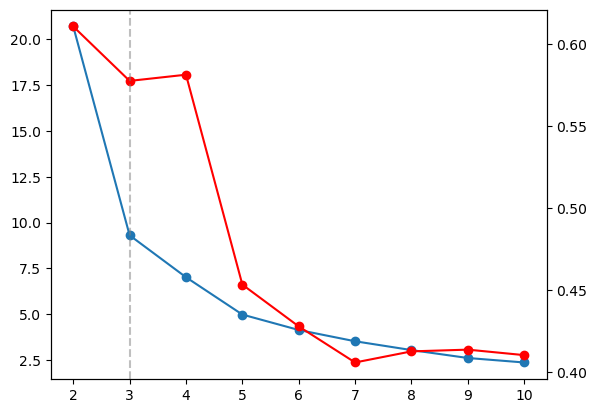

In [43]:
# Plot the Elbow method
# Plot the elbow curve
fig, ax1 = plt.subplots()
ax1.plot(range(2,11), wcss, marker='o')
# ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(range(2,11), silhouette_scores, 'r', marker='o')
ax2.axvline(3,color='grey',alpha=.5, linestyle='--')


In [44]:
ks = range(2,10)
inertia = []

for i in ks:
    kmean_model = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmean_model.fit(X_tfidf_pca)
    inertia.append(kmean_model.inertia_)

Text(0, 0.5, 'Inertia')

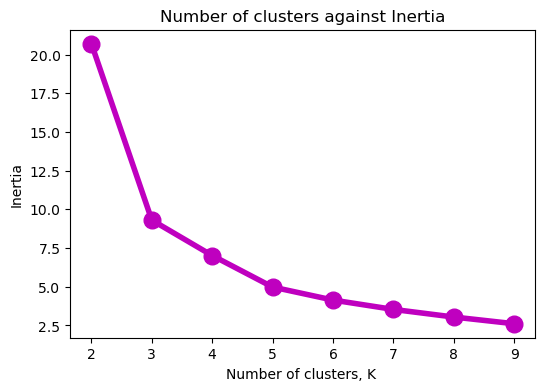

In [45]:
plt.figure(figsize=(6, 4))
plt.plot(ks, inertia,"o-m", linewidth=4, markersize=12)
plt.title("Number of clusters against Inertia", fontsize=12)
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")

In [46]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


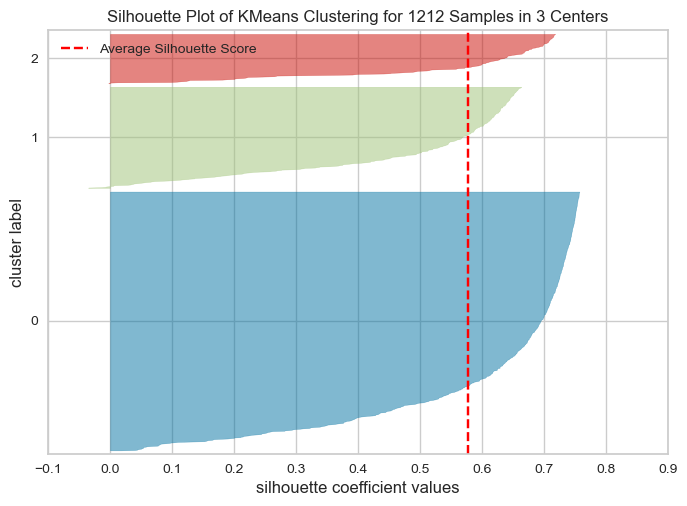

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=3, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_tfidf_pca)
visualizer.show()
plt.show()

In [48]:
!pip install kneed

In [49]:
from kneed import KneeLocator

kl = KneeLocator(ks, inertia, curve="convex", direction="decreasing")
kl.elbow

3

choosing 3 cluster as the number of cluster

In [50]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit_predict(X_tfidf_pca)

array([2, 2, 0, ..., 0, 0, 0])

In [51]:
df['cluster_kmeans_tfidf'] = kmeans.labels_

<Axes: xlabel='pca_tfidf_1', ylabel='pca_tfidf_2'>

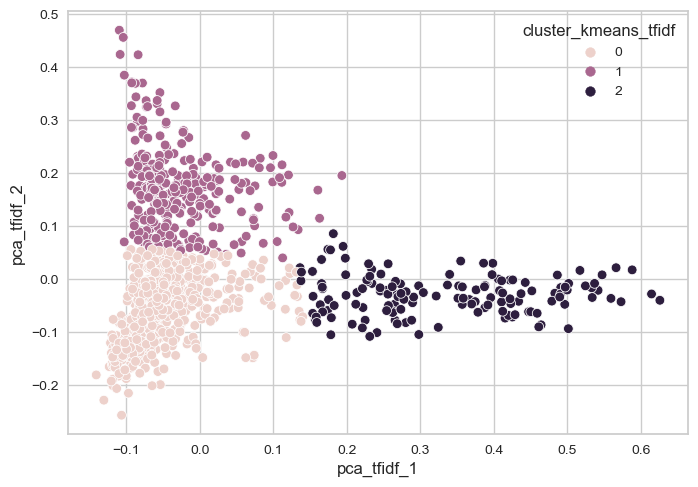

In [52]:
sns.scatterplot(df, x='pca_tfidf_1', y='pca_tfidf_2', hue='cluster_kmeans_tfidf')

In [53]:
kmean_labels = kmeans.labels_
print(kmean_labels)

kmean_cluster_centers = kmeans.cluster_centers_
print(kmean_cluster_centers)

[2 2 0 ... 0 0 0]
[[-0.05221359 -0.06011899]
 [-0.02824188  0.16961121]
 [ 0.33230215 -0.02995036]]


In [54]:
print("Silhoutte Score")
silhouette_score(df[['pca_tfidf_1','pca_tfidf_2']], df['cluster_kmeans_tfidf'])

Silhoutte Score


0.5773414016051759

Interpretation

In [55]:
df.head()

category transactional_value  \
0  Computers&Accessories|Accessories&Peripherals|...                ₹399   
1  Computers&Accessories|Accessories&Peripherals|...                ₹199   
2  Computers&Accessories|Accessories&Peripherals|...                ₹199   
3  Computers&Accessories|Accessories&Peripherals|...                ₹329   
4  Computers&Accessories|Accessories&Peripherals|...                ₹154   

                                      review_content          main_category  \
0  Looks durable Charging is fine tooNo complains...  Computers&Accessories   
1  I ordered this cable to connect my phone to An...  Computers&Accessories   
2  Not quite durable and sturdy,https://m.media-a...  Computers&Accessories   
3  Good product,long wire,Charges good,Nice,I bou...  Computers&Accessories   
4  Bought this instead of original apple, does th...  Computers&Accessories   

                                          clean_text  pca_tfidf_1  \
0  [look, durable, charge, fine, toono, complains...     0.415437   
1  [order, cable, connect, phone, android, auto, ...     0.486540   
2  [quite, durable, sturdy, image, riggrbucl, sy,...    -0.017245   
3  [good, product, long, wire, charge, good, nice...     0.265744   
4  [bought, instead, original, apple, work, fast,...     0.491129   

   pca_tfidf_2  cluster_kmeans_tfidf  
0    -0.073395                     2  
1     0.007786                     2  
2    -0.122202                     0  
3    -0.077435                     2  
4    -0.015843                     2

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df is your DataFrame
grouped_by_cluster = df.groupby('cluster_kmeans_tfidf')['clean_text'].apply(lambda x: ' '.join([' '.join(text) for text in x]))

# Use CountVectorizer to get word frequencies for each cluster
vectorizer = CountVectorizer()
cluster_word_counts = vectorizer.fit_transform(grouped_by_cluster)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Display top 10 words for each cluster
for cluster, word_count in enumerate(cluster_word_counts):
    top_words = [feature_names[i] for i in word_count.indices[np.argsort(word_count.data)[-50:]]]
    print(f"Cluster {cluster} Top Words: {', '.join(top_words)}\n-------------------------------------------\n")


Cluster 0 Top Words: size, could, worth, laptop, purchase, bit, heat, amazon, little, issue, fine, clean, light, much, day, take, speed, power, even, would, overall, small, month, really, great, come, give, value, need, buy, best, money, look, go, make, time, also, water, nice, price, well, get, like, one, quality, easy, work, use, product, good
-------------------------------------------

Cluster 1 Top Words: month, connect, really, button, review, range, bluetooth, need, overall, feel, screen, come, would, best, donot, give, ear, device, nice, buy, camera, earphone, charge, bass, issue, remote, great, even, feature, look, go, call, day, time, also, watch, one, like, well, phone, price, battery, get, tv, work, sound, product, use, quality, good
-------------------------------------------

Cluster 2 Top Words: apple, purchase, samsung, last, bought, length, great, data, worth, wire, mobile, car, sturdy, fine, value, issue, durable, best, time, buy, type, device, nice, speed, port, supp

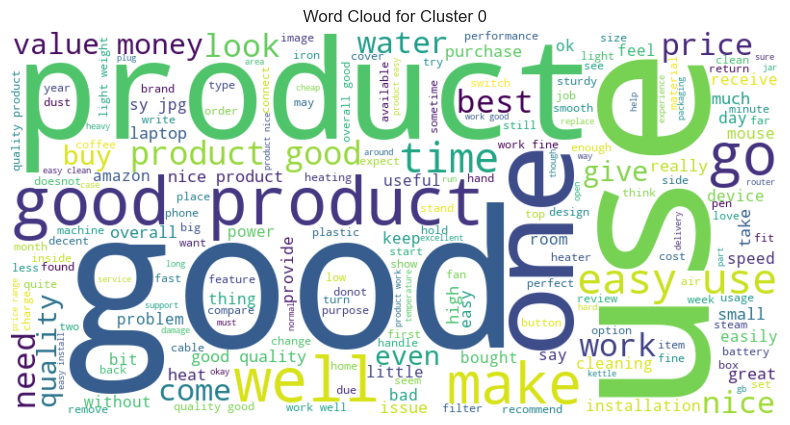

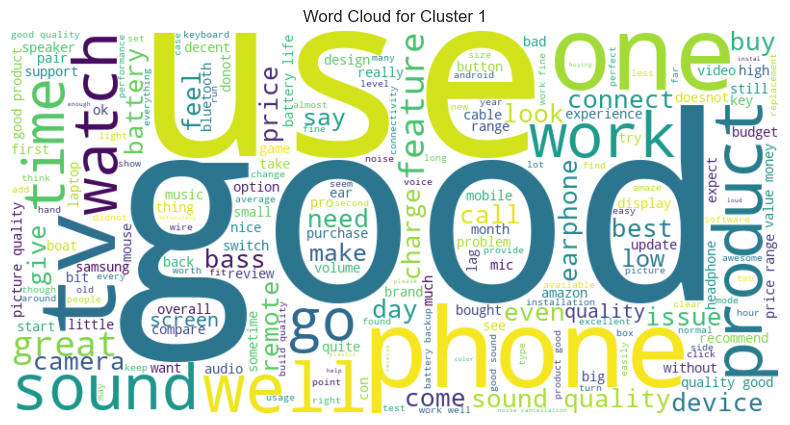

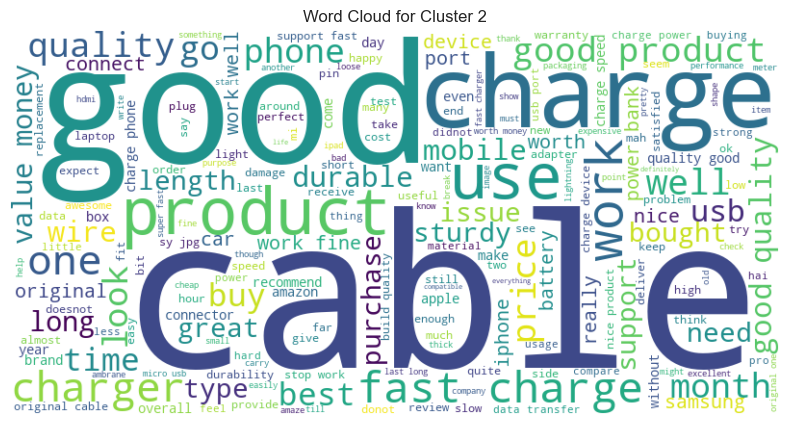

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Iterate through clusters
for cluster, text in grouped_by_cluster.items():
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster}")
    plt.show()


## Hierarchical Clustering

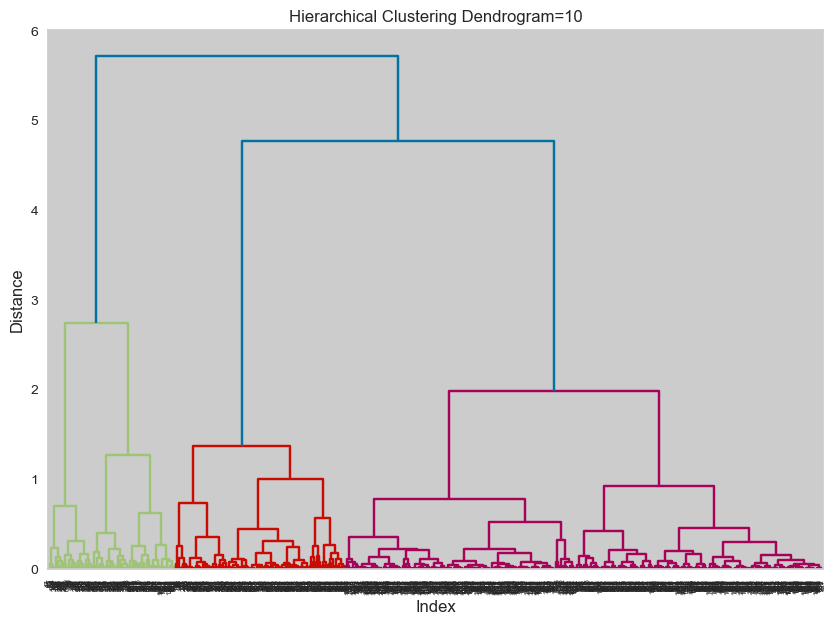

In [58]:
# Perform Hierarchical Clustering
# linkage methods (e.g., 'ward', 'complete', 'average', etc.) and distances.

n_clusters = 10  # Number of clusters try
linkage_method = 'ward'  # Linkage method

# Fit the hierarchical clustering model
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method,metric = 'euclidean')
clusters = model.fit_predict(X_tfidf_pca)

# Visualizing the dendrogram (optional but helpful for determining number of clusters)
# Calculate the linkage matrix
linkage_matrix = linkage(X_tfidf_pca, method=linkage_method, metric = 'euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram=10')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# 'clusters' variable now contains the cluster labels for each data point

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define a range of clusters to evaluate
min_clusters = 2
max_clusters = 10

best_score = -1
optimal_clusters = min_clusters

# Iterate through different numbers of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    model = AgglomerativeClustering(n_clusters=n_clusters,metric = 'euclidean', linkage = 'ward')
    clusters = model.fit_predict(X_tfidf_pca)
    silhouette_avg = silhouette_score(X_tfidf_pca, clusters)
    
    print(f"For {n_clusters} clusters, silhouette score: {silhouette_avg}")
    
    # Update the best silhouette score and optimal number of clusters
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        optimal_clusters = n_clusters

print(f"Optimal number of clusters: {optimal_clusters}, with silhouette score: {best_score}")

# Now, use the optimal number of clusters for further analysis or visualization


For 2 clusters, silhouette score: 0.5252786169833715
For 3 clusters, silhouette score: 0.5543407665153464
For 4 clusters, silhouette score: 0.5471780250058761
For 5 clusters, silhouette score: 0.42019093538338537
For 6 clusters, silhouette score: 0.39253688020451916
For 7 clusters, silhouette score: 0.39300401744889935
For 8 clusters, silhouette score: 0.3950718888145576
For 9 clusters, silhouette score: 0.35975678818063006
For 10 clusters, silhouette score: 0.3367543496376988
Optimal number of clusters: 3, with silhouette score: 0.5543407665153464


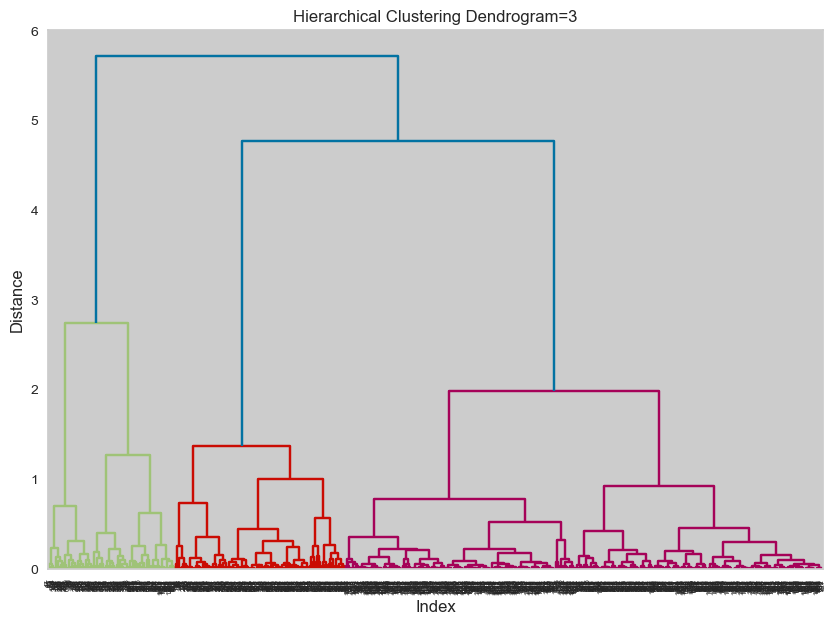

In [60]:
#use the optimum number of clusters

n_clusters = 3  # Number of clusters
linkage_method = 'ward'  # Linkage method

# Fit the hierarchical clustering model
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method,metric = 'euclidean')

df['cluster_h'] = model.fit_predict(X_tfidf_pca) #add new column for hierachical clusters

# Visualizing the dendrogram (optional but helpful for determining number of clusters)
# Calculate the linkage matrix
linkage_matrix = linkage(X_tfidf_pca, method=linkage_method, metric = 'euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram=3')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [61]:
df[['clean_text','cluster_h']]

clean_text  cluster_h
0     [look, durable, charge, fine, toono, complains...          0
1     [order, cable, connect, phone, android, auto, ...          0
2     [quite, durable, sturdy, image, riggrbucl, sy,...          1
3     [good, product, long, wire, charge, good, nice...          0
4     [bought, instead, original, apple, work, fast,...          0
...                                                 ...        ...
1207  [receive, product, without, spanner, excellent...          1
1208  [ok, get, everything, mention, measure, cup, b...          1
1209  [plastic, cool, body, find, sturdy, surface, p...          1
1210  [instal, kitchen, work, fine, fan, speed, slow...          1
1211  [job, perfectly, issue, temp, control, perfect...          1

[1212 rows x 2 columns]

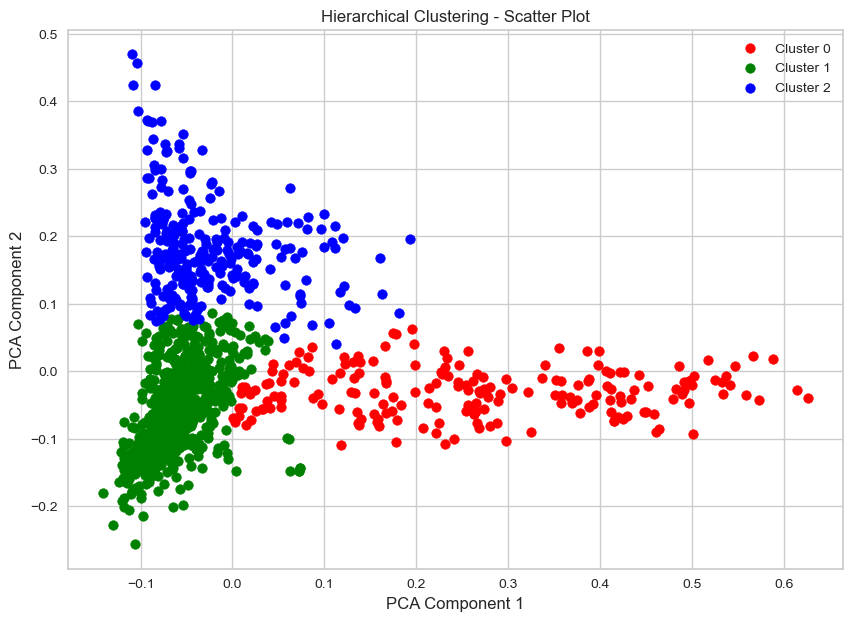

In [97]:
# Scatter plot for Hierarchical Clustering with 3 clusters

plt.figure(figsize=(10, 7))

# Define colors for each cluster
colors = ['red', 'green', 'blue']

# Plot points with colors based on hierarchical clusters
for cluster_num, color in zip(range(n_clusters), colors):
    cluster_points = df[df['cluster_h'] == cluster_num]
    plt.scatter(cluster_points['pca_tfidf_1'], cluster_points['pca_tfidf_2'], c=color, label=f'Cluster {cluster_num}')



plt.title('Hierarchical Clustering - Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [86]:
# Group by cluster and analyze characteristics
cluster_profiles = df.groupby('cluster_h')[['main_category', 'clean_text']].describe()

# Sort by highest frequency of main_category
sorted_cluster_profiles = cluster_profiles.sort_values(('main_category', 'freq'), ascending=False)

# Display sorted cluster profiles
sorted_cluster_profiles


main_category                                    clean_text         \
                  count unique                    top freq      count unique   
cluster_h                                                                      
1                   746      7           Home&Kitchen  440        746    745   
2                   267      3            Electronics  240        267    266   
0                   199      4  Computers&Accessories  140        199    197   

                                                                   
                                                         top freq  
cluster_h                                                          
1          [good, product, like, good, item, strong, usef...    2  
2          [pro, xiomi, best, budget, nice, picture, qual...    2  
0          [look, durable, charge, fine, toono, complains...    2

In [83]:
df

category transactional_value  \
0     Computers&Accessories|Accessories&Peripherals|...                ₹399   
1     Computers&Accessories|Accessories&Peripherals|...                ₹199   
2     Computers&Accessories|Accessories&Peripherals|...                ₹199   
3     Computers&Accessories|Accessories&Peripherals|...                ₹329   
4     Computers&Accessories|Accessories&Peripherals|...                ₹154   
...                                                 ...                 ...   
1207  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...                ₹379   
1208  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              ₹2,280   
1209  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...              ₹2,219   
1210  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...              ₹1,399   
1211  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              ₹2,863   

                                         review_content  \
0     Looks durable Charging is fine tooNo complains...   
1     I ordered this cable to connect my phone to An...   
2     Not quite durable and sturdy,https://m.media-a...   
3     Good product,long wire,Charges good,Nice,I bou...   
4     Bought this instead of original apple, does th...   
...                                                 ...   
1207  I received product without spanner,Excellent p...   
1208  ok,got everything as mentioned but the measuri...   
1209  plastic but cool body ,u have to find sturdy s...   
1210  I have installed this in my kitchen working fi...   
1211  It does it job perfectly..only issue is temp c...   

              main_category  \
0     Computers&Accessories   
1     Computers&Accessories   
2     Computers&Accessories   
3     Computers&Accessories   
4     Computers&Accessories   
...                     ...   
1207           Home&Kitchen   
1208           Home&Kitchen   
1209           Home&Kitchen   
1210           Home&Kitchen   
1211           Home&Kitchen   

                                             clean_text  pca_tfidf_1  \
0     [look, durable, charge, fine, toono, complains...     0.415437   
1     [order, cable, connect, phone, android, auto, ...     0.486540   
2     [quite, durable, sturdy, image, riggrbucl, sy,...    -0.017245   
3     [good, product, long, wire, charge, good, nice...     0.265744   
4     [bought, instead, original, apple, work, fast,...     0.491129   
...                                                 ...          ...   
1207  [receive, product, without, spanner, excellent...    -0.069587   
1208  [ok, get, everything, mention, measure, cup, b...    -0.088735   
1209  [plastic, cool, body, find, sturdy, surface, p...    -0.066405   
1210  [instal, kitchen, work, fine, fan, speed, slow...    -0.009564   
1211  [job, perfectly, issue, temp, control, perfect...    -0.077757   

      pca_tfidf_2  cluster_kmeans_tfidf  cluster_h  cluster_gmm  
0       -0.073395                     2          0            2  
1        0.007786                     2          0            2  
2       -0.122202                     0          1            1  
3       -0.077435                     2          0            2  
4       -0.015843                     2          0            2  
...           ...                   ...        ...          ...  
1207    -0.062205                     0          1            0  
1208    -0.089884                     0          1            0  
1209    -0.108303                     0          1            0  
1210    -0.038059                     0          1            1  
1211    -0.080456                     0          1            0  

[1212 rows x 10 columns]

In [63]:
# Example: Tailor marketing strategies based on cluster characteristics
for cluster, characteristics in cluster_profiles.iterrows():
    print(f"Cluster {cluster} Marketing Strategy:")
    print(f"   Preferred Categories: {characteristics['main_category']['top']}")
    print(f"   Common Feedback: {characteristics['clean_text']['top']}")
    print("\n-------------------------------------------\n")


Cluster 0 Marketing Strategy:
   Preferred Categories: Computers&Accessories
   Common Feedback: ['look', 'durable', 'charge', 'fine', 'toono', 'complains', 'charge', 'really', 'fast', 'good', 'product', 'till', 'satisfied', 'quality', 'good', 'product', 'charge', 'speed', 'slow', 'original', 'iphone', 'cable', 'good', 'quality', 'would', 'recommend', 'image', 'zghl', 'sy', 'jpg', 'product', 'work', 'well', 'till', 'date', 'issue', 'cable', 'also', 'sturdy', 'enough', 'ask', 'replacement', 'company', 'value', 'money']

-------------------------------------------

Cluster 1 Marketing Strategy:
   Preferred Categories: Home&Kitchen
   Common Feedback: ['good', 'product', 'like', 'good', 'item', 'strong', 'useful', 'usb', 'cablevalue', 'moneythanks', 'amazon', 'producer', 'image', 'zre', 'sy', 'jpg', 'good', 'nice', 'product', 'useful', 'product', 'sturdy', 'support', 'charge']

-------------------------------------------

Cluster 2 Marketing Strategy:
   Preferred Categories: Electronics

## Gaussian Mixture Model algorithm

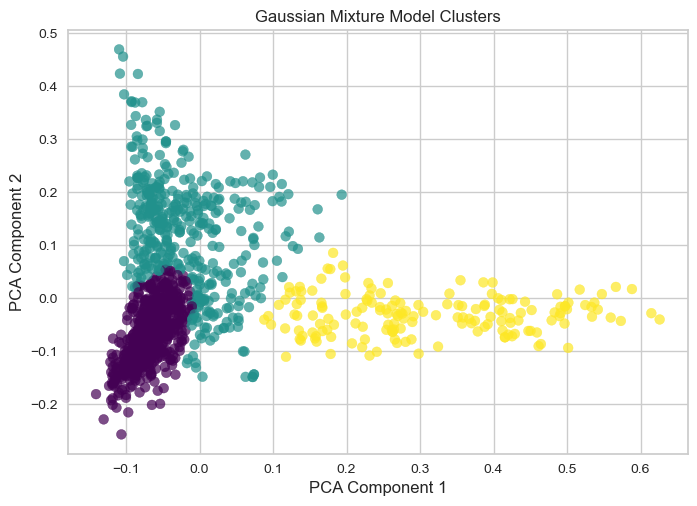

                                             clean_text  cluster_gmm
0     [look, durable, charge, fine, toono, complains...            2
1     [order, cable, connect, phone, android, auto, ...            2
2     [quite, durable, sturdy, image, riggrbucl, sy,...            1
3     [good, product, long, wire, charge, good, nice...            2
4     [bought, instead, original, apple, work, fast,...            2
...                                                 ...          ...
1207  [receive, product, without, spanner, excellent...            0
1208  [ok, get, everything, mention, measure, cup, b...            0
1209  [plastic, cool, body, find, sturdy, surface, p...            0
1210  [instal, kitchen, work, fine, fan, speed, slow...            1
1211  [job, perfectly, issue, temp, control, perfect...            0

[1212 rows x 2 columns]
Silhouette Score for 3 clusters: 0.4923341859949735


In [77]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the number of clusters
n_clusters = 3 #based on k-means and hierarichal

# Create a GMM model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to your data
clusters = gmm.fit_predict(X_tfidf_pca)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_tfidf_pca, clusters)

# Add the cluster labels to your DataFrame
df['cluster_gmm'] = clusters

# Visualize the clusters in the first two principal components
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('Gaussian Mixture Model Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Display the cluster assignments
print(df[['clean_text', 'cluster_gmm']])
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


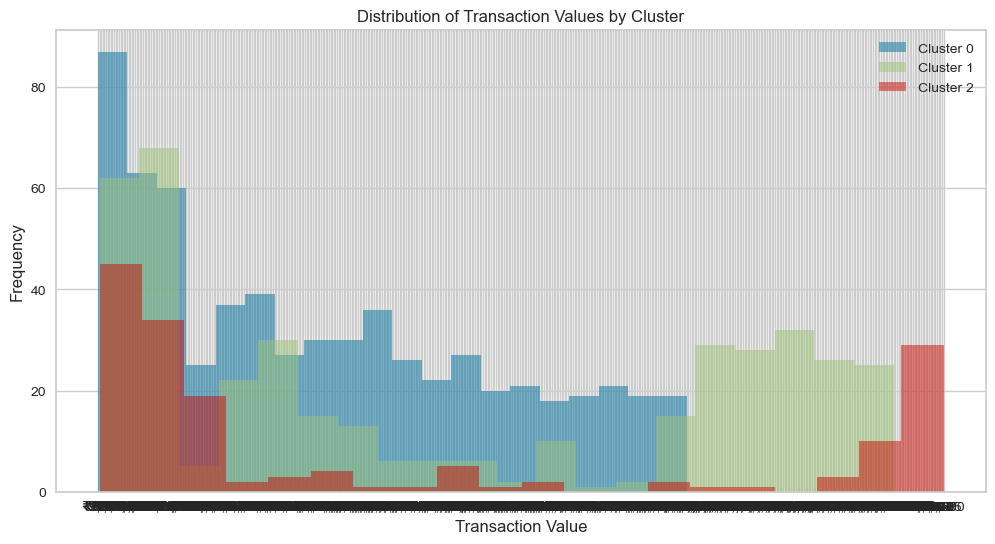

In [78]:
# Group by cluster and compute descriptive statistics
cluster_stats = df.groupby('cluster_gmm')['transactional_value'].describe()

# Visualize the distribution of transaction values within each cluster
plt.figure(figsize=(12, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['cluster_gmm'] == cluster]['transactional_value']
    plt.hist(cluster_data, bins=20, alpha=0.5, label=f'Cluster {cluster}')

plt.title('Distribution of Transaction Values by Cluster')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
